### Helper scripts to tidy data:


In [37]:
# imports
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

import glob





In [6]:
def tidy_dataframe(df, path_to_save_csv, years, variable_name):

    # Select the first column as the fixed column and the remaining columns as the data columns
    fixed_col = df.iloc[:, 0]
    # duplicate it the fixed columns x amount for years
    fixed_col = pd.concat([fixed_col]*years, ignore_index=True)

    data_cols = df.iloc[:, 1:]

    # Use the Pandas "melt" function to create a new dataframe where the data columns are duplicated in the "year" and "value" columns
    df_melted = pd.melt(data_cols, value_name=variable_name, var_name='Year')

    # Combine the fixed column and the melted dataframe to create the final dataframe
    df_final = pd.concat([fixed_col, df_melted], axis=1)

    # cast renting cost to float
    ### Note Tableau works with , ARCGIS with . so change it accordingly
    df_final[variable_name] = df_final[variable_name].str.replace(',', ".").astype(float)

    # cast ints of year to be a date 
    df_final["Year"] = pd.to_datetime(df_final["Year"], format="%Y")

    print(df_final.info())

    # save it as csv
    df_final.to_csv(path_to_save_csv, sep=';')

    return df_final

### How many people already live in their own homes

Data sources: ownership_rate_austria_2004-2021.csv, rent_rate_austria_2004-2021.csv

In [7]:
# Load the data from a CSV file using a semicolon as the delimiter character
ownership_df = pd.read_csv('data_sources/files/ownership_rate_austria_2004-2021.csv', delimiter=';')
rentrate_df = pd.read_csv('data_sources/files/rent_rate_austria_2004-2021.csv', delimiter=';')
# Print the first 5 rows of the dataframe
ownership_df.head(10)

,Location,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Österreich,"50,3","50,9","51,2","51,7","50,8","50,8","50,2","49,7","49,3","49,7","49,6","49,2","48,2","47,8","48,1","48,5","48,8","47,9"
1,Burgenland,"76,1","78,2","78,1","75,8","75,9","75,1","73,8","71,8","74,4","74,8","73,2","72,0","70,9","72,2","72,1","69,1","68,0","68,5"
2,Kärnten,"55,2","57,1","57,7","58,8","55,5","57,4","56,2","55,5","55,8","56,0","58,7","58,9","54,9","55,6","56,8","57,2","57,3","54,5"
3,Niederösterreich,"65,8","67,4","67,0","66,4","66,5","66,9","65,9","64,4","64,1","63,8","63,6","63,8","62,3","62,0","62,0","62,8","63,7","62,7"
4,Oberösterreich,"54,1","53,5","54,3","54,8","53,2","52,8","52,1","52,6","52,7","53,0","52,4","53,6","53,4","51,3","52,1","53,0","51,6","51,5"
5,Salzburg,"55,5","55,1","54,2","54,0","54,5","54,7","54,9","53,8","53,1","54,9","52,8","52,3","51,6","51,7","52,0","51,6","51,5","51,2"
6,Steiermark,"59,6","60,6","61,2","62,8","61,5","60,6","58,9","58,7","59,4","60,3","58,8","57,9","56,8","55,5","56,0","58,3","57,9","56,7"
7,Tirol,"57,0","57,3","57,1","59,7","58,8","59,0","57,6","57,2","55,4","57,0","57,1","56,6","53,5","53,8","53,4","51,8","54,0","53,0"
8,Voralberg,"61,0","61,1","62,2","63,3","61,5","62,0","62,4","61,5","60,0","60,7","60,5","60,6","58,8","58,4","57,5","58,0","55,9","55,8"
9,Wien,"19,3","19,4","20,3","20,2","19,5","19,4","19,7","19,7","18,5","18,5","19,8","18,0","18,9","19,1","19,4","18,8","20,4","19,3"


In [10]:
rentrate_df.head(10)

,Location,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Österreich,"40,7","40,4","39,9","40,1","40,3","40,7","41,2","41,3","41,4","41,8","41,6","42,0","42,7","43,1","42,8","42,8","42,7","42,9"
1,Burgenland,"13,1","13,4","13,7","15,0","15,4","16,6","16,7","18,6","17,9","19,4","19,3","19,6","20,3","19,2","19,1","21,1","21,5","20,7"
2,Kärnten,"33,5","31,9","31,7","31,9","33,6","33,2","34,3","34,7","34,5","33,9","31,8","32,1","35,3","34,9","33,5","33,7","33,7","34,6"
3,Niederösterreich,"23,8","23,4","23,3","24,1","24,0","23,8","24,4","26,1","25,9","25,8","25,6","25,7","26,4","27,1","27,7","27,2","27,4","27,9"
4,Oberösterreich,"33,2","33,5","32,3","32,8","33,5","34,5","35,0","34,0","33,5","34,4","33,7","32,7","33,7","35,3","34,3","34,1","35,6","35,2"
5,Salzburg,"33,3","33,5","33,7","33,1","32,3","31,9","32,7","34,0","35,1","34,2","35,9","36,0","36,6","36,1","35,0","36,6","36,8","36,8"
6,Steiermark,"32,2","31,5","30,7","29,5","30,8","31,6","32,1","32,7","31,7","32,0","33,2","33,4","34,0","34,9","35,1","33,6","34,0","34,4"
7,Tirol,"31,3","30,5","30,4","29,4","30,4","29,6","31,4","32,7","32,2","32,8","31,7","32,3","34,8","34,4","34,9","35,9","33,9","34,1"
8,Voralberg,"30,4","29,8","29,0","29,0","29,3","29,9","30,0","30,5","31,0","31,3","31,9","31,5","32,1","33,1","34,5","33,7","35,4","35,4"
9,Wien,"77,3","77,5","76,8","77,4","76,9","77,9","77,7","76,0","77,4","78,2","77,2","79,4","78,3","78,2","77,5","78,1","76,9","77,2"


In [8]:
ownership_df_tidy = tidy_dataframe(ownership_df, 'tidy_dataframes/ownership_rate_austria_2004-2021.csv', years=18, variable_name= "Ownership Rate")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Location        180 non-null    object        
 1   Year            180 non-null    datetime64[ns]
 2   Ownership Rate  180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB
None


In [9]:
rent_rate_df_tidy = tidy_dataframe(rentrate_df, 'tidy_dataframes/rent_rate_austria_2004-2021.csv', years=18, variable_name= "Rent Rate")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Location   180 non-null    object        
 1   Year       180 non-null    datetime64[ns]
 2   Rent Rate  180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB
None


In [22]:
ownership_df_tidy.head()

,Location,Year,Ownership Rate
0,Österreich,2004-01-01,50.3
1,Burgenland,2004-01-01,76.1
2,Kärnten,2004-01-01,55.2
3,Niederösterreich,2004-01-01,65.8
4,Oberösterreich,2004-01-01,54.1


In [10]:
ownership_austria_tidy = ownership_df_tidy[ownership_df_tidy['Location'] == 'Österreich']
ownership_austria_tidy = ownership_austria_tidy.sort_values(by="Year", ascending=False)
ownership_austria_tidy.head()

,Location,Year,Ownership Rate
170,Österreich,2021-01-01,47.9
160,Österreich,2020-01-01,48.8
150,Österreich,2019-01-01,48.5
140,Österreich,2018-01-01,48.1
130,Österreich,2017-01-01,47.8


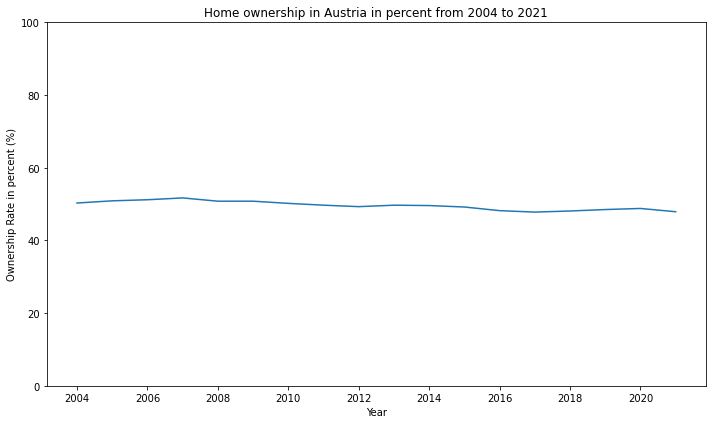

In [19]:
plt.figure(figsize=(10,6), tight_layout=True)
plt.ylim(0, 100)
plt.plot(ownership_austria_tidy['Year'], ownership_austria_tidy['Ownership Rate'])
plt.title('Home ownership in Austria in percent from 2004 to 2021')
plt.ylabel('Ownership Rate in percent (%)')
plt.xlabel('Year')
plt.savefig("imgs/home_ownership_austria_2004_2021.png", format="png", dpi=300)
plt.show()


In [12]:
rent_rate_austria_tidy = rent_rate_df_tidy[rent_rate_df_tidy['Location'] == 'Österreich']
rent_rate_austria_tidy = rent_rate_austria_tidy.sort_values(by="Year", ascending=False)
rent_rate_austria_tidy.head()

,Location,Year,Rent Rate
170,Österreich,2021-01-01,42.9
160,Österreich,2020-01-01,42.7
150,Österreich,2019-01-01,42.8
140,Österreich,2018-01-01,42.8
130,Österreich,2017-01-01,43.1


Add a graph that lets the user switch between 2004 and 2021 and shows an according choropleht map
Adjsut the y limit of the graph.

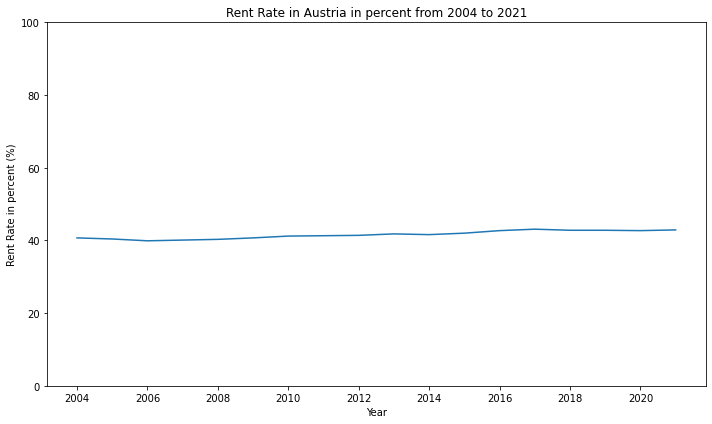

In [20]:
plt.figure(figsize=(10,6), tight_layout=True)
plt.ylim(0, 100)
plt.plot(rent_rate_austria_tidy['Year'], rent_rate_austria_tidy['Rent Rate'])
plt.title('Rent Rate in Austria in percent from 2004 to 2021')
plt.ylabel('Rent Rate in percent (%)')
plt.xlabel('Year')
plt.savefig("imgs/rent_rate_austria_2004_2021.png", format="png", dpi=300)
plt.show()

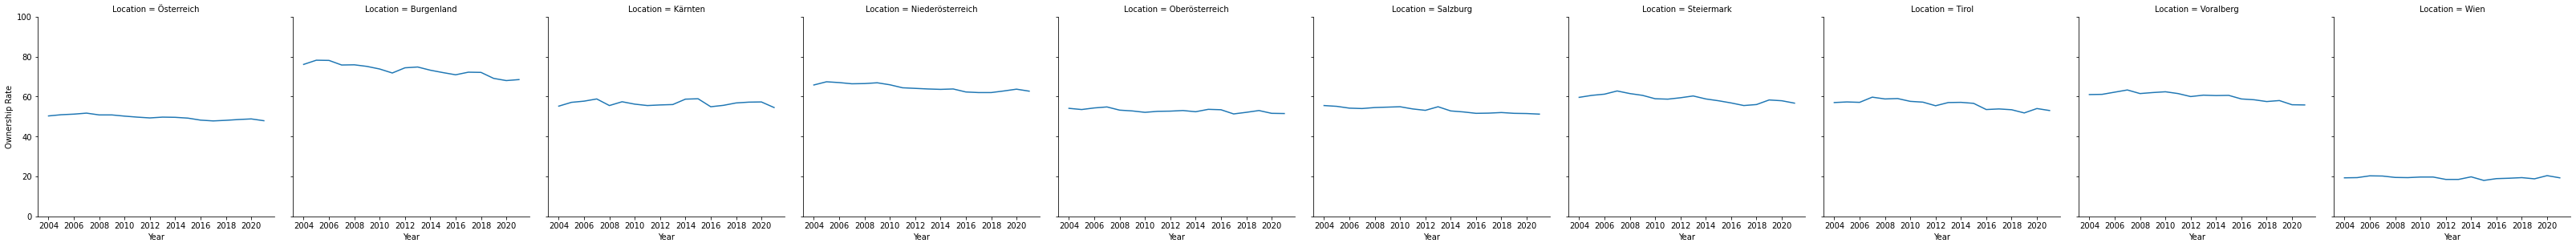

In [28]:
g = sns.FacetGrid(ownership_df_tidy, col='Location')
g.map(sns.lineplot, 'Year', 'Ownership Rate')
g.fig.set_figwidth(45)
g.fig.set_figheight(5)
g.set(ylim=(0, 100))
plt.savefig("imgs/home_ownership_all_regions.png", format="png", dpi=300)


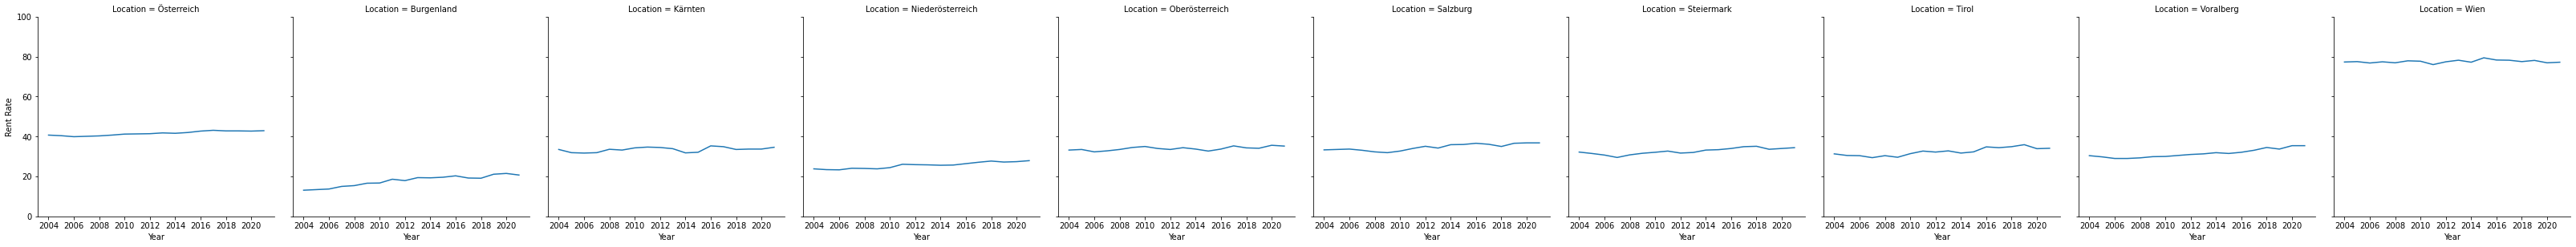

In [29]:
g = sns.FacetGrid(rent_rate_df_tidy, col='Location')
g.map(sns.lineplot, 'Year', 'Rent Rate')
g.fig.set_figwidth(45)
g.fig.set_figheight(5)
g.set(ylim=(0, 100))
plt.savefig("imgs/rent_rate_all_regions.png", format="png", dpi=300)

In [33]:
ownership_austria_2004_tidy = ownership_df_tidy[ownership_df_tidy['Year'] == '01/01/2004']
ownership_austria_2004_tidy = ownership_austria_2004_tidy.sort_values(by="Year", ascending=False)
ownership_austria_2004_tidy.head(9)
ownership_austria_2004_tidy.to_csv('tidy_dataframes/home_ownership_rent_rate/home_ownership_austria_2004.csv', sep=';')

In [34]:
ownership_austria_2004_tidy = ownership_df_tidy[ownership_df_tidy['Year'] == '01/01/2021']
ownership_austria_2004_tidy = ownership_austria_2004_tidy.sort_values(by="Year", ascending=False)
ownership_austria_2004_tidy.head(9)
ownership_austria_2004_tidy.to_csv('tidy_dataframes/home_ownership_rent_rate/home_ownership_austria_2021.csv', sep=';')

### In order to build a home you first need a piece of land. How does the land price differentiate in certain parts of Austria?

In [140]:
# read in all csvs and concentanate them

path = "data_sources\\files\\property_prices_austria_csv\\"
all_files = glob.glob(os.path.join(path, "*.csv"))

austria_property_prices_df = pd.concat((pd.read_csv(f, delimiter=',') for f in all_files), ignore_index=True)
austria_property_prices_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gemeindenummer  2116 non-null   object 
 1   Gemeindename    2115 non-null   object 
 2   Fläche          2115 non-null   object 
 3   Einwohner       2115 non-null   float64
 4   Baulandpreis    2115 non-null   object 
 5   Grünlandpreis   2115 non-null   object 
dtypes: float64(1), object(5)
memory usage: 107.2+ KB


In [141]:
austria_property_prices_df.head()

,Gemeindenummer,Gemeindename,Fläche,Einwohner,Baulandpreis,Grünlandpreis
0,30501.0,Allhartsberg,"21,28",2.147,"44,09","3,66"
1,30502.0,Amstetten,"51,95",23.841,"80,31","3,56"
2,30503.0,Ardagger,"46,93",3.541,"42,93","2,54"
3,30504.0,Aschbach-Markt,"37,26",3.819,"45,00","4,50"
4,30506.0,Behamberg,"20,27",3.426,"70,85","3,89"


In [142]:
# rename columns
austria_property_prices_df.rename(columns = {'Gemeindenummer':'Municipalitynumber'}, inplace = True)
austria_property_prices_df.rename(columns = {'Gemeindename':'Municipality'}, inplace = True)
austria_property_prices_df.rename(columns = {'Fläche':'Size'}, inplace = True)
austria_property_prices_df.rename(columns = {'Einwohner':'Residents'}, inplace = True)
austria_property_prices_df.rename(columns = {'Baulandpreis':'Buildingprice'}, inplace = True)
austria_property_prices_df.rename(columns = {'Grünlandpreis':'Grasslandprice'}, inplace = True)
austria_property_prices_df.head()

,Municipalitynumber,Municipality,Size,Residents,Buildingprice,Grasslandprice
0,30501.0,Allhartsberg,"21,28",2.147,"44,09","3,66"
1,30502.0,Amstetten,"51,95",23.841,"80,31","3,56"
2,30503.0,Ardagger,"46,93",3.541,"42,93","2,54"
3,30504.0,Aschbach-Markt,"37,26",3.819,"45,00","4,50"
4,30506.0,Behamberg,"20,27",3.426,"70,85","3,89"


In [143]:
def prep_property_prices(df):
    '''
    remove empty strings
    removes keine Angabe and input NULL
    make floats out of price and residents 
    '''

    # Remove rows that contain an empty string
    df = df[df != '']

    # Replace "Keine Angabe" with NULL
    df = df.replace({'keine Angabe': None})

    # Replace commas with periods in specific columns
    df['Size'] = df['Size'].str.replace(',', '.', 1)

    df['Residents'] = df['Residents'].astype(str)
    df['Residents'] = df['Residents'].str.replace('.', '')


    # 1.148,46 replace . -> "" -> 1148,46 replace , -> . 1148.46
    df['Buildingprice'] = df['Buildingprice'].str.replace('.', '')
    df['Buildingprice'] = df['Buildingprice'].str.replace(',', '.')
    
    df['Grasslandprice'] = df['Grasslandprice'].str.replace(',', '.', 1)

    # Convert specific columns to floats
    df['Size'] = df['Size'].astype(float)
    df['Residents'] = df['Residents'].astype(float)
    df['Buildingprice'] = df['Buildingprice'].astype(float)
    df['Grasslandprice'] = df['Grasslandprice'].astype(float)

     
    
    return df

In [144]:
austria_property_prices_df = prep_property_prices(austria_property_prices_df)
austria_property_prices_df.head()

C:\Users\Zarre\AppData\Local\Temp\ipykernel_17060\1067654891.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Residents'] = df['Residents'].str.replace('.', '')
C:\Users\Zarre\AppData\Local\Temp\ipykernel_17060\1067654891.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Buildingprice'] = df['Buildingprice'].str.replace('.', '')


,Municipalitynumber,Municipality,Size,Residents,Buildingprice,Grasslandprice
0,30501.0,Allhartsberg,21.28,2147.0,44.09,3.66
1,30502.0,Amstetten,51.95,23841.0,80.31,3.56
2,30503.0,Ardagger,46.93,3541.0,42.93,2.54
3,30504.0,Aschbach-Markt,37.26,3819.0,45.00,4.50
4,30506.0,Behamberg,20.27,3426.0,70.85,3.89


In [145]:
austria_property_prices_df.to_csv('tidy_dataframes/property_prices/austria_property_prices.csv', sep=';')

### How is the development of the house pricing index over the last years?

### How does the rental price look like through Austria?

In [168]:
# import the datetime class
from datetime import datetime
import pandas as pd

# Load the data from a CSV file using a semicolon as the delimiter character
renting_costs_df = pd.read_csv('renting_costs_austria_2004_2021.csv', delimiter=';')
# Print the first 5 rows of the dataframe
renting_costs_df.head()

,Location,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Burgenland,"4,06","3,97","3,91","4,21","4,43","4,41","4,64","4,78","4,86","5,06","5,36","5,51","5,82","5,93","6,02","6,43","6,33"
1,Kärnten,"4,55","4,61","4,76","4,84","4,88","4,93","5,13","5,27","5,38","5,56","5,71","5,89","6,03","6,15","6,34","6,49","6,43"
2,Niederösterreich,"4,77","4,82","4,86","5,05","5,24","5,42","5,59","5,89","6,04","6,24","6,30","6,53","6,81","6,92","7,09","7,43","7,37"
3,Oberösterreich,"5,15","5,25","5,24","5,46","5,69","5,75","5,88","6,08","6,32","6,48","6,67","6,86","7,15","7,36","7,50","7,68","7,65"
4,Salzburg,"6,49","6,64","6,97","6,95","7,03","7,12","7,41","7,93","8,06","8,36","8,66","9,04","9,17","9,23","9,53","9,90","10,06"


In [169]:
def tidy_dataframe(df, path_to_save_csv):

    # Select the first column as the fixed column and the remaining columns as the data columns
    fixed_col = renting_costs_df.iloc[:, 0]
    # duplicate it 17 times
    fixed_col = pd.concat([fixed_col]*17, ignore_index=True)

    data_cols = renting_costs_df.iloc[:, 1:]

    # Use the Pandas "melt" function to create a new dataframe where the data columns are duplicated in the "year" and "value" columns
    df_melted = pd.melt(data_cols, value_name='Renting_Costs', var_name='Year')

    # Combine the fixed column and the melted dataframe to create the final dataframe
    df_final = pd.concat([fixed_col, df_melted], axis=1)

    # cast renting cost to float
    df_final["Renting_Costs"] = df_final["Renting_Costs"].str.replace(',', ".").astype(float)

    # cast ints of year to be a date 
    df_final["Year"] = pd.to_datetime(df_final["Year"], format="%Y")

    print(df_final.info())

    # save it as csv
    df_final.to_csv(path_to_save_csv, sep=';')

    return df_final

In [170]:
renting_costs_df_tidy = tidy_dataframe(renting_costs_df)

AttributeError: 'DatetimeProperties' object has no attribute 'end_of_year'

In [159]:
renting_costs_df_tidy.head(18)

,Location,Year,Renting_Costs
0,Burgenland,2005,4.06
1,Kärnten,2005,4.55
2,Niederösterreich,2005,4.77
3,Oberösterreich,2005,5.15
4,Salzburg,2005,6.49
5,Steiermark,2005,5.12
6,Tirol,2005,6.27
7,Voralberg,2005,6.21
8,Wien,2005,5.34
9,Burgenland,2006,3.97


### How much of their total income are Austrians spending on living costs?